In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Loading the dataset
data = pd.read_csv(r'C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\17 Support Vector Machines\forestfires.csv')

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
# Spliting data into features (X) and labels (y)
X = data.drop('size_category', axis=1)
y = data['size_category']

In [5]:
# Converting categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['month', 'day'])

In [6]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initializing the SVM classifier
svm_classifier = SVC(kernel='linear')

In [9]:
# Training the model on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [10]:
# Predicting the labels for the testing data
y_pred = svm_classifier.predict(X_test_scaled)

In [11]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9134615384615384


In [12]:
# Generating a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       large       0.88      0.79      0.83        28
       small       0.92      0.96      0.94        76

    accuracy                           0.91       104
   macro avg       0.90      0.87      0.89       104
weighted avg       0.91      0.91      0.91       104



# Precision: For the "large" class: 0.88 (88%), for the "small" class: 0.92 (92%) the model has predicted correctly.

# Recall (Sensitivity): For the "large" class: 0.79 (79%), For the "small" class: 0.96 (96%) the model correctly predicted that it actually belong to that class. 

# F1-Score: For the "large" class: 0.83, For the "small" class: 0.94. The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when classes are imbalanced.

# Support: For the "large" class: 28 instances, For the "small" class: 76 instances. Support indicates the number of actual instances in each class in the testing dataset.

# Accuracy: Overall accuracy of the model: 0.91 (91%).

# Macro Avg: Precision: 0.90 (90%), Recall: 0.87 (87%), F1-Score: 0.89 (89%)

# Weighted Avg: Precision: 0.91 (91%), Recall: 0.91 (91%), F1-Score: 0.91 (91%)

# Thus all above values are indicating a good performance by the model.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [14]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

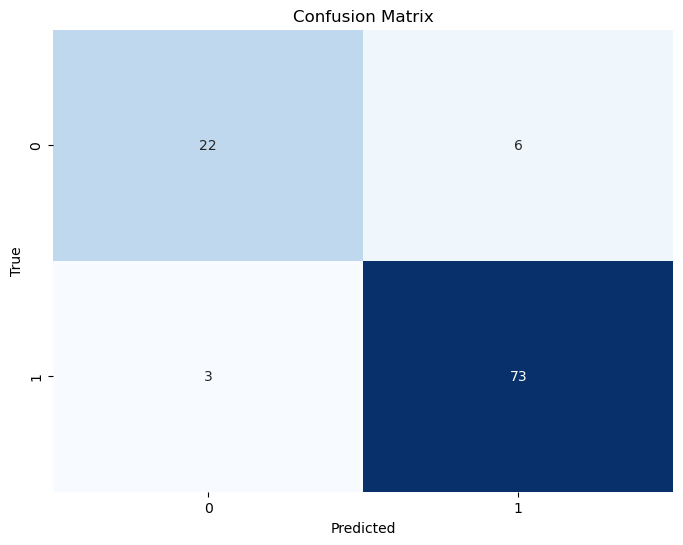

In [15]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# True Negative (TN): The number of instances (22) that were correctly predicted as "Small" by the model.
# False Positive (FP): The number of instances (6) that were incorrectly predicted as "Large" when they were actually "Small". These are also known as Type I errors or false alarms.
# False Negative (FN): The number of instances (3) that were incorrectly predicted as "Small" when they were actually "Large". These are also known as Type II errors or misses.
# True Positive (TP): The number of instances (73) that were correctly predicted as "Large" by the model.

In [16]:
import numpy as np

In [17]:
# Vary C parameter
C_range = np.logspace(-3, 3, 7)
accuracy_scores = []

for C_value in C_range:
    svm_classifier = SVC(kernel='linear', C=C_value)
    svm_classifier.fit(X_train_scaled, y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

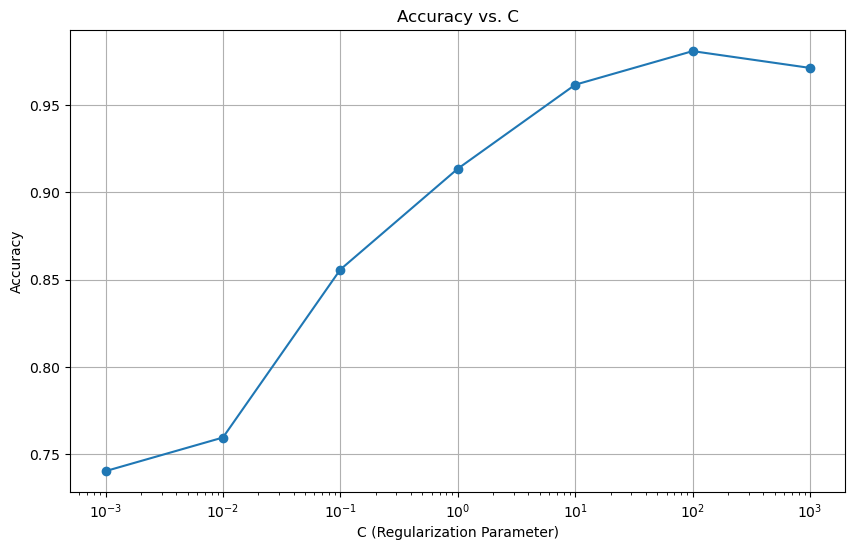

In [18]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(C_range, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C')
plt.grid()
plt.show()

# 1. An accuracy peak at a high C value, such as 100, might suggest that the model is fitting the training data very closely. This could lead to overfitting, where the model captures noise and anomalies in the training data, resulting in reduced performance on unseen data.
# 2. A high C value may lead to a model with high variance, meaning it's very sensitive to small fluctuations in the training data. This can cause the model to perform well on the training data but poorly on new data.